In [1]:
import pandas as pd


In [2]:
movies = pd.read_csv('C:/Users/INTEL/Documents/movies.csv', sep=(','))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
tags = pd.read_csv('C:/Users/INTEL/Documents/tags.csv', sep=(','))
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [4]:
ratings = pd.read_csv('C:/Users/INTEL/Documents/ratings.csv', sep=(',') , parse_dates=['timestamp'])
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
del ratings['timestamp']
del tags['timestamp']

In [39]:
row_0=tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [7]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [8]:
row_0= row_0.rename('one')
row_0.name

'one'

In [9]:
tags.iloc[[2,4,6]]

,userId,movieId,tag
2,2,60756,will ferrell
4,2,89774,MMA
6,2,106782,drugs


# Descriptive statistics #

In [10]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [11]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [12]:
ratings['rating'].mean()

3.501556983616962

In [13]:
ratings['rating'].min()

0.5

In [14]:
ratings['rating'].max()

5.0

In [15]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [16]:
fill= ratings['rating']>5
print(fill)


0         False
1         False
2         False
3         False
4         False
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: rating, Length: 100836, dtype: bool


In [17]:
fill= ratings['rating']>5
fill.any()

False

In [18]:
fill= ratings['rating']>5
fill.all()

False

# Data Cleaning #


In [19]:
movies.shape

(9742, 3)

In [20]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [21]:
tags.shape

(3683, 3)

In [22]:
tags.isnull().all()

userId     False
movieId    False
tag        False
dtype: bool

# Data Visualization #

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000094D6AC5CC8>]],
      dtype=object)

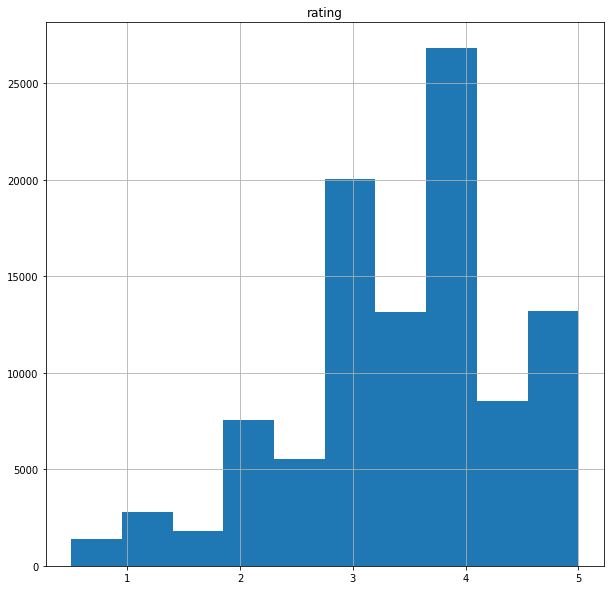

In [23]:
%matplotlib inline
ratings.hist(column='rating' , figsize=(10,10))

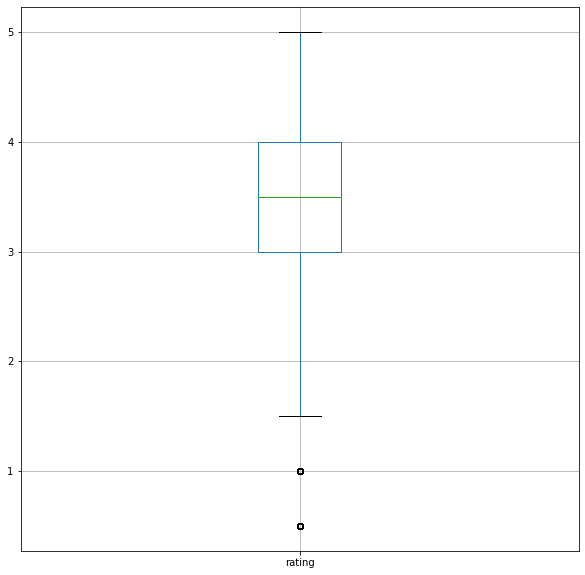

In [24]:
ratings.boxplot(column='rating' , figsize=(10,10))

In [ ]:
ratings.plot()

In [25]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [26]:
movies[['genres', 'title']].head()

,genres,title
0,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,Adventure|Children|Fantasy,Jumanji (1995)
2,Comedy|Romance,Grumpier Old Men (1995)
3,Comedy|Drama|Romance,Waiting to Exhale (1995)
4,Comedy,Father of the Bride Part II (1995)


In [27]:
ratings[100:110]

,userId,movieId,rating
100,1,1573,5.0
101,1,1580,3.0
102,1,1587,5.0
103,1,1617,5.0
104,1,1620,4.0
105,1,1625,5.0
106,1,1644,3.0
107,1,1676,3.0
108,1,1732,5.0
109,1,1777,4.0


In [28]:
count1=tags['tag'].value_counts()
count1[:10]

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
surreal               23
funny                 23
Disney                23
religion              22
psychology            21
quirky                21
Name: tag, dtype: int64

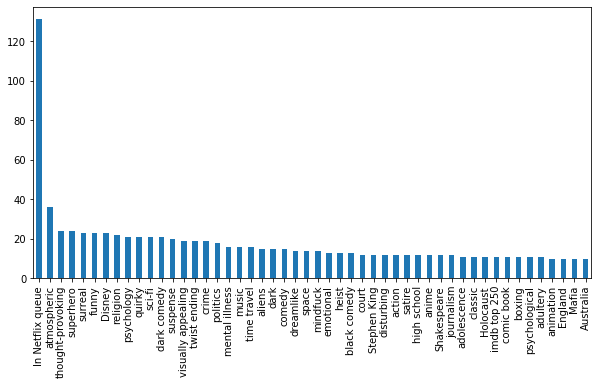

In [29]:
count1[:50].plot(kind='bar', figsize=(10,5))

In [30]:
count2=ratings['rating'].value_counts()
count2

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

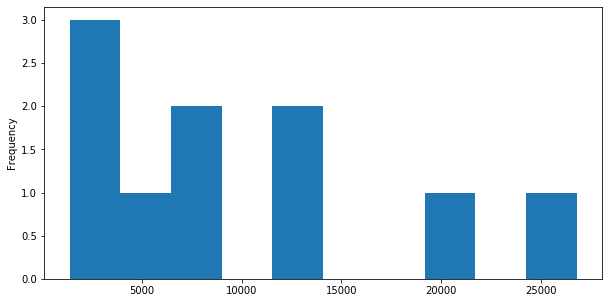

In [31]:
count2.plot(kind='hist', figsize=(10,5))

# Filters for selecting rows #

In [32]:
high_rated= ratings['rating']>=4
ratings[high_rated][:10]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0
10,1,163,5.0


In [33]:
is_animation= movies['genres'].str.contains('Animation')
movies[is_animation][:11]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical


In [34]:
movies[is_animation].head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical


In [35]:
rating_count= ratings[['movieId', 'rating']].groupby('movieId').count()
rating_count

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [36]:
ratings[['movieId', 'rating']]

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
100831,166534,4.0
100832,168248,5.0
100833,168250,5.0
100834,168252,5.0
